In [1]:
from urllib.request import urlopen
from xml.etree.ElementTree import parse
import pandas as pd
from lxml import etree
import seaborn as sns
from datetime import timedelta
import datetime
from tqdm import tqdm

In [5]:
today = datetime.datetime.today().date()
inicio = datetime.datetime(1959,12,31).date()

rango = today - inicio
rango = rango.days
rango

22864

In [6]:
today = datetime.datetime.today().date()
felipe = datetime.datetime(1982,12,2).date()

rango = today - felipe
rango = rango.days
rango


14492

In [86]:
# BUENA LISTA DE URLS
primera_fecha = datetime(1959,12,31)
fecha = primera_fecha
full_url = []

for i in range(rango):
    fecha += timedelta(days=1)
    fecha_str = str(fecha.date()).replace("-","")
    u = "https://boe.es/diario_boe/xml.php?id=BOE-S-{0}".format(fecha_str)
    full_url.append(u)


In [87]:
lista_desde_felipe =  full_url[-14491:]
lista_desde_felipe

['https://boe.es/diario_boe/xml.php?id=BOE-S-19600101',
 'https://boe.es/diario_boe/xml.php?id=BOE-S-19600102']

In [331]:
var_url = urlopen("https://boe.es/diario_boe/xml.php?id=BOE-S-20141007")
doc = etree.parse(var_url)

raiz = doc.getroot()
meta = raiz[0]
diario = raiz[1]

boe = diario.getchildren()[0].attrib.values()[0]
url_pdf = diario.getchildren()[0].find("urlPdf").text
fecha = meta[2].text

In [ ]:
# TREE
for i in diario.getchildren():
    print(i.values())


In [332]:
full = []

for i in diario.getchildren():
    for j in i:
        for z in j:
            for a in z:
                for b in a:
                    if not b.text.startswith("/"):
                        full.append([i.attrib.values()[1], j.attrib.values()[0], j.attrib.values()[1], z.attrib.values()[0], b.text, fecha, boe, url_pdf])

In [56]:
from datetime import datetime


In [78]:
df = pd.read_csv("boe_felipe.csv", parse_dates=["fecha"], dayfirst=True)
df

,Unnamed: 0,departamento,ministerio,etiqueta,Epigrafe,text,fecha,boe,pdf,epigrafe,url
0,0,"II. Autoridades y personal. - Nombramientos, s...",JEFATURA DEL ESTADO,7723,NaN,"Real Decreto 3285/1982, de 1 de diciembre, por...",1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Nombramientos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...
1,1,"II. Autoridades y personal. - Nombramientos, s...",JEFATURA DEL ESTADO,7723,NaN,"Real Decreto 3286/1982, de 1 de diciembre, por...",1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Ceses,https://boe.es/diario_boe/xml.php?id=BOE-S-198...
2,2,"II. Autoridades y personal. - Nombramientos, s...",PRESIDENCIA DEL GOBIERNO,7786,NaN,Orden de 29 de octubre de 1982 por la que se r...,1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Destinos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...
3,3,"II. Autoridades y personal. - Nombramientos, s...",PRESIDENCIA DEL GOBIERNO,7786,NaN,Orden de 29 de noviembre de 1982 por la que se...,1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Destinos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...
4,4,"II. Autoridades y personal. - Nombramientos, s...",MINISTERIO DE ASUNTOS EXTERIORES,7110,NaN,Orden de 20 de noviembre de 1982 por la que se...,1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Ascensos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...
...,...,...,...,...,...,...,...,...,...,...,...
794773,58,III. Otras disposiciones,BANCO DE ESPAÑA,1020,NaN,"Resolución de 3 de agosto de 2022, del Banco d...",2022-08-04,BOE-S-2022-186,/boe/dias/2022/08/04/pdfs/BOE-S-2022-186.pdf,Mercado de divisas,https://boe.es/diario_boe/xml.php?id=BOE-S-202...
794774,59,III. Otras disposiciones,COMUNIDAD AUTÓNOMA DE CATALUÑA,8070,NaN,"Resolución de 28 de junio de 2022, de la Direc...",2022-08-04,BOE-S-2022-186,/boe/dias/2022/08/04/pdfs/BOE-S-2022-186.pdf,Entidades de inspección y control,https://boe.es/diario_boe/xml.php?id=BOE-S-202...
794775,60,III. Otras disposiciones,COMUNIDAD AUTÓNOMA DE CATALUÑA,8070,NaN,"Resolución de 11 de julio de 2022, de la Direc...",2022-08-04,BOE-S-2022-186,/boe/dias/2022/08/04/pdfs/BOE-S-2022-186.pdf,Homologaciones,https://boe.es/diario_boe/xml.php?id=BOE-S-202...
794776,61,III. Otras disposiciones,COMUNIDAD DE CASTILLA Y LEÓN,9531,NaN,"Acuerdo 155/2022, de 21 de julio, de la Junta ...",2022-08-04,BOE-S-2022-186,/boe/dias/2022/08/04/pdfs/BOE-S-2022-186.pdf,Bienes de interés cultural,https://boe.es/diario_boe/xml.php?id=BOE-S-202...


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794778 entries, 0 to 794777
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    794778 non-null  int64         
 1   departamento  794778 non-null  object        
 2   ministerio    794778 non-null  object        
 3   etiqueta      794778 non-null  object        
 4   Epigrafe      0 non-null       float64       
 5   text          794778 non-null  object        
 6   fecha         794778 non-null  datetime64[ns]
 7   boe           794778 non-null  object        
 8   pdf           794778 non-null  object        
 9   epigrafe      794778 non-null  object        
 10  url           794778 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 66.7+ MB


In [81]:
rango

2

In [82]:
df.fecha.iloc[-1].date()

datetime.date(2022, 8, 4)

In [83]:


# DESDE ULTIMO BOE
ultima_fecha = df.fecha.iloc[-1].date()
fecha = ultima_fecha
hoy = datetime.today().date()

rango = hoy - ultima_fecha
rango = rango.days
rango


nuevos_boes = []

for i in range(rango):
    fecha += timedelta(days=1)
    fecha_str = str(fecha.date()).replace("-","")
    u = "https://boe.es/diario_boe/xml.php?id=BOE-S-{0}".format(fecha_str)
    nuevos_boes.append(u)

nuevos_boes


AttributeError: 'datetime.date' object has no attribute 'date'

In [84]:
fecha

datetime.date(2022, 8, 5)

In [71]:
for url in tqdm(nuevos_boes):
    
    var = urlopen(url)
    doc = etree.parse(var)
    raiz = doc.getroot()

    try:
        meta = raiz[0]
    except IndexError:
        meta = "NO META"
    
    try:
        diario = raiz[1]
    except IndexError:
        diario = "NO DIARIO"

    try:
        boe = diario.getchildren()[0].attrib.values()[0]
    except AttributeError:
        boe = "NO BOE"
    try:
        url_pdf = diario.getchildren()[0].find("urlPdf").text
    except AttributeError:
        url_pdf = "NO URL"

    try:
        fecha = meta[2].text
    except IndexError:
        fecha = "NO FECHA"

    full = []

    try:
        for i in diario.getchildren():
            for j in i:
                for z in j:
                    for a in z:
                        for b in a:
                            if not b.text.startswith("/"):
                                full.append([i.attrib.values()[1], j.attrib.values()[0], j.attrib.values()[1], z.attrib.values()[0], b.text, fecha, boe, url_pdf,url])
    except AttributeError:
        full.append(["Error","Error","Error","Error","Error",pd.to_datetime(url[-8:]),"Error","Error",url])
    
    df_ = pd.DataFrame(full, columns=["departamento", "ministerio", "etiqueta", "epigrafe", "text", "fecha", "boe","pdf", "url"])
    df = pd.concat([df,df_], axis=0)

#df.to_csv("boe_felipe.csv")



100%|██████████| 2/2 [00:01<00:00,  1.28it/s]


In [76]:
full

[]

In [569]:
df_csv = pd.read_csv("boe_felipe.csv")
boe_df = df_csv.copy()
boe_df.drop("Epigrafe", axis=1, inplace=True)
boe_df.fecha = pd.to_datetime(boe_df.fecha, dayfirst=True)
boe_df.drop("Unnamed: 0", axis=1, inplace=True)
boe_error_df = boe_df[boe_df.departamento == "Error"]
boe_df.drop(boe_df[boe_df.departamento == "Error"].index, inplace=True)
boe_df["gobierno"] = 0

In [600]:
felipe_1 = (boe_df['fecha'] >= '1982-12-2') & (boe_df['fecha'] <= '1986-07-22')
felipe_2 = (boe_df['fecha'] >= '1986-07-23') & (boe_df['fecha'] <= '1989-10-30')
felipe_3 = (boe_df['fecha'] >= '1989-10-31') & (boe_df['fecha'] <= '1993-06-07')
felipe_4 = (boe_df['fecha'] >= '1993-06-08') & (boe_df['fecha'] <= '1996-05-03')

aznar_1 = (boe_df['fecha'] >= '1996-05-04') & (boe_df['fecha'] <= '2000-03-04')
aznar_2 = (boe_df['fecha'] >= '2000-03-05') & (boe_df['fecha'] <= '2004-04-16')

zapatero_1 = (boe_df['fecha'] >= '2004-04-17') & (boe_df['fecha'] <= '2008-03-10')
zapatero_2 = (boe_df['fecha'] >= '2008-03-10') & (boe_df['fecha'] <= '2011-12-20')

rajoy_1 = (boe_df['fecha'] >= '2011-12-21') & (boe_df['fecha'] <= '2015-12-21')
rajoy_2 = (boe_df['fecha'] >= '2015-12-22') & (boe_df['fecha'] <= '2018-06-01')

sanchez_1 = (boe_df['fecha'] >= '2018-06-02') & (boe_df['fecha'] <= '2019-04-29')
sanchez_2 = (boe_df['fecha'] >= '2019-04-30')

,departamento,ministerio,etiqueta,text,fecha,boe,pdf,epigrafe,url,gobierno
467734,III. Otras disposiciones,MINISTERIO DE JUSTICIA,4810,Suplemento,2000-04-06,BOE-S-2000-83,/boe/dias/2000/04/06/pdfs/BOE-S-2000-83.pdf,BOE-A-2000-6630,https://boe.es/diario_boe/xml.php?id=BOE-S-200...,Aznar_2
467738,III. Otras disposiciones,MINISTERIO DE ASUNTOS EXTERIORES,7110,Suplemento,2000-04-26,BOE-S-2000-100,/boe/dias/2000/04/26/pdfs/BOE-S-2000-100.pdf,BOE-A-2000-7790,https://boe.es/diario_boe/xml.php?id=BOE-S-200...,Aznar_2
467741,III. Otras disposiciones,MINISTERIO DE TRABAJO Y ASUNTOS SOCIALES,4430,Suplemento,2000-05-10,BOE-S-2000-112,/boe/dias/2000/05/10/pdfs/BOE-S-2000-112.pdf,BOE-A-2000-8679,https://boe.es/diario_boe/xml.php?id=BOE-S-200...,Aznar_2
467744,III. Otras disposiciones,MINISTERIO DE EDUCACIÓN Y CULTURA,4240,"Resolución de 10 de abril del 2000, de la Secr...",2000-05-22,BOE-S-2000-122,/boe/dias/2000/05/22/pdfs/BOE-S-2000-122.pdf,Cursos de especialización,https://boe.es/diario_boe/xml.php?id=BOE-S-200...,Aznar_2
467745,III. Otras disposiciones,MINISTERIO DE EDUCACIÓN Y CULTURA,4240,"Resolución de 19 de abril de 2000, de la Secre...",2000-05-22,BOE-S-2000-122,/boe/dias/2000/05/22/pdfs/BOE-S-2000-122.pdf,Subvenciones,https://boe.es/diario_boe/xml.php?id=BOE-S-200...,Aznar_2
...,...,...,...,...,...,...,...,...,...,...
468178,III. Otras disposiciones,CORTES GENERALES,1220,Suplemento,2004-03-05,BOE-S-2004-56,/boe/dias/2004/03/05/pdfs/BOE-S-2004-56.pdf,BOE-A-2004-4076,https://boe.es/diario_boe/xml.php?id=BOE-S-200...,Aznar_2
468180,I. Disposiciones generales,MINISTERIO DE LA PRESIDENCIA,7710,Suplemento,2004-03-09,BOE-S-2004-59,/boe/dias/2004/03/09/pdfs/BOE-S-2004-59.pdf,BOE-A-2004-4219,https://boe.es/diario_boe/xml.php?id=BOE-S-200...,Aznar_2
468186,I. Disposiciones generales,MINISTERIO DE ASUNTOS EXTERIORES,7110,Suplemento,2004-04-12,BOE-S-2004-88,/boe/dias/2004/04/12/pdfs/BOE-S-2004-88.pdf,BOE-A-2004-6401,https://boe.es/diario_boe/xml.php?id=BOE-S-200...,Aznar_2
468187,I. Disposiciones generales,MINISTERIO DE ASUNTOS EXTERIORES,7110,Suplemento,2004-04-14,BOE-S-2004-90,/boe/dias/2004/04/14/pdfs/BOE-S-2004-90.pdf,BOE-A-2004-6525,https://boe.es/diario_boe/xml.php?id=BOE-S-200...,Aznar_2


In [594]:
boe_df.loc[(boe_df['fecha'] >= '1982-12-2') & (boe_df['fecha'] <= '1986-06-23'), "gobierno"] = "Felipe_1"
boe_df.loc[(boe_df['fecha'] >= '1986-07-23') & (boe_df['fecha'] <= '1989-10-30'), "gobierno"] = "Felipe_2"
boe_df.loc[(boe_df['fecha'] >= '1989-10-31') & (boe_df['fecha'] <= '1993-06-07'), "gobierno"] = "Felipe_3"
boe_df.loc[(boe_df['fecha'] >= '1993-06-08') & (boe_df['fecha'] <= '1996-05-03'), "gobierno"] = "Felipe_4"

boe_df.loc[(boe_df['fecha'] >= '1996-05-04') & (boe_df['fecha'] <= '2000-03-04'),"gobierno"] = "Aznar_1"
boe_df.loc[(boe_df['fecha'] >= '2000-03-05') & (boe_df['fecha'] <= '2004-04-16'), "gobierno"] = "Aznar_2"

boe_df.loc[(boe_df['fecha'] >= '2004-04-17') & (boe_df['fecha'] <= '2008-03-10'), "gobierno"] = "Zapatero_1"
boe_df.loc[(boe_df['fecha'] >= '2008-03-10') & (boe_df['fecha'] <= '2011-12-20'), "gobierno"] = "Zapatero_2"

boe_df.loc[(boe_df['fecha'] >= '2011-12-21') & (boe_df['fecha'] <= '2015-12-21'), "gobierno"] = "Rajoy_1"
boe_df.loc[(boe_df['fecha'] >= '2015-12-22') & (boe_df['fecha'] <= '2018-06-01'), "gobierno"] = "Rajoy_2"

boe_df.loc[(boe_df['fecha'] >= '2018-06-02') & (boe_df['fecha'] <= '2019-04-29'), "gobierno"] = "Sanchez_1"
boe_df.loc[(boe_df['fecha'] >= '2019-04-30'), "gobierno"] = "Sanchez_2"

In [595]:
boe_df

,departamento,ministerio,etiqueta,text,fecha,boe,pdf,epigrafe,url,gobierno
0,"II. Autoridades y personal. - Nombramientos, s...",JEFATURA DEL ESTADO,7723,"Real Decreto 3285/1982, de 1 de diciembre, por...",1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Nombramientos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1
1,"II. Autoridades y personal. - Nombramientos, s...",JEFATURA DEL ESTADO,7723,"Real Decreto 3286/1982, de 1 de diciembre, por...",1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Ceses,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1
2,"II. Autoridades y personal. - Nombramientos, s...",PRESIDENCIA DEL GOBIERNO,7786,Orden de 29 de octubre de 1982 por la que se r...,1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Destinos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1
3,"II. Autoridades y personal. - Nombramientos, s...",PRESIDENCIA DEL GOBIERNO,7786,Orden de 29 de noviembre de 1982 por la que se...,1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Destinos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1
4,"II. Autoridades y personal. - Nombramientos, s...",MINISTERIO DE ASUNTOS EXTERIORES,7110,Orden de 20 de noviembre de 1982 por la que se...,1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Ascensos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1
...,...,...,...,...,...,...,...,...,...,...
794773,III. Otras disposiciones,BANCO DE ESPAÑA,1020,"Resolución de 3 de agosto de 2022, del Banco d...",2022-08-04,BOE-S-2022-186,/boe/dias/2022/08/04/pdfs/BOE-S-2022-186.pdf,Mercado de divisas,https://boe.es/diario_boe/xml.php?id=BOE-S-202...,Sanchez_2
794774,III. Otras disposiciones,COMUNIDAD AUTÓNOMA DE CATALUÑA,8070,"Resolución de 28 de junio de 2022, de la Direc...",2022-08-04,BOE-S-2022-186,/boe/dias/2022/08/04/pdfs/BOE-S-2022-186.pdf,Entidades de inspección y control,https://boe.es/diario_boe/xml.php?id=BOE-S-202...,Sanchez_2
794775,III. Otras disposiciones,COMUNIDAD AUTÓNOMA DE CATALUÑA,8070,"Resolución de 11 de julio de 2022, de la Direc...",2022-08-04,BOE-S-2022-186,/boe/dias/2022/08/04/pdfs/BOE-S-2022-186.pdf,Homologaciones,https://boe.es/diario_boe/xml.php?id=BOE-S-202...,Sanchez_2
794776,III. Otras disposiciones,COMUNIDAD DE CASTILLA Y LEÓN,9531,"Acuerdo 155/2022, de 21 de julio, de la Junta ...",2022-08-04,BOE-S-2022-186,/boe/dias/2022/08/04/pdfs/BOE-S-2022-186.pdf,Bienes de interés cultural,https://boe.es/diario_boe/xml.php?id=BOE-S-202...,Sanchez_2


In [605]:
boe_df["color"] = 0

In [606]:
boe_df.loc[(boe_df['gobierno'] == 'Aznar_1') | (boe_df['gobierno'] == 'Aznar_2') | (boe_df['gobierno'] == 'Rajoy_1') | (boe_df['gobierno'] == 'Rajoy_2'), "color"] = "Derecha"
boe_df.loc[(boe_df['gobierno'] == 'Felipe_1') | (boe_df['gobierno'] == 'Felipe_2') | (boe_df['gobierno'] == 'Felipe_3') | (boe_df['gobierno'] == 'Felipe_4') | (boe_df['gobierno'] == 'Zapatero_1') | (boe_df['gobierno'] == 'Zapatero_2') | (boe_df['gobierno'] == 'Sanchez_1') | (boe_df['gobierno'] == 'Sanchez_2') , "color"] = "Izquierda"

<AxesSubplot:xlabel='color'>

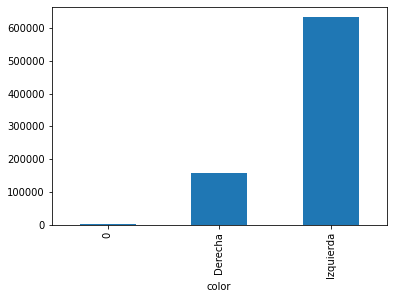

In [607]:
boe_df.groupby("color").size().plot.bar()

boe_df.info()

In [616]:
boe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792721 entries, 0 to 794777
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   departamento  792721 non-null  object        
 1   ministerio    792721 non-null  object        
 2   etiqueta      792721 non-null  object        
 3   text          792721 non-null  object        
 4   fecha         792721 non-null  datetime64[ns]
 5   boe           792721 non-null  object        
 6   pdf           792721 non-null  object        
 7   epigrafe      792721 non-null  object        
 8   url           792721 non-null  object        
 9   gobierno      792721 non-null  object        
 10  color         792721 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 88.7+ MB


In [618]:
felipe_df = boe_df[boe_df["gobierno"].str.contains("Felipe", na=False)]
aznar_df = boe_df[boe_df["gobierno"].str.contains("Aznar", na=False)]
zapatero_df = boe_df[boe_df["gobierno"].str.contains("Zapatero", na=False)]
rajoy_df = boe_df[boe_df["gobierno"].str.contains("Rajoy", na=False)]
sanchez_df = boe_df[boe_df["gobierno"].str.contains("Sanchez", na=False)]

In [635]:
felipe_df

,departamento,ministerio,etiqueta,text,fecha,boe,pdf,epigrafe,url,gobierno,color
0,"II. Autoridades y personal. - Nombramientos, s...",JEFATURA DEL ESTADO,7723,"Real Decreto 3285/1982, de 1 de diciembre, por...",1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Nombramientos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1,Izquierda
1,"II. Autoridades y personal. - Nombramientos, s...",JEFATURA DEL ESTADO,7723,"Real Decreto 3286/1982, de 1 de diciembre, por...",1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Ceses,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1,Izquierda
2,"II. Autoridades y personal. - Nombramientos, s...",PRESIDENCIA DEL GOBIERNO,7786,Orden de 29 de octubre de 1982 por la que se r...,1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Destinos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1,Izquierda
3,"II. Autoridades y personal. - Nombramientos, s...",PRESIDENCIA DEL GOBIERNO,7786,Orden de 29 de noviembre de 1982 por la que se...,1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Destinos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1,Izquierda
4,"II. Autoridades y personal. - Nombramientos, s...",MINISTERIO DE ASUNTOS EXTERIORES,7110,Orden de 20 de noviembre de 1982 por la que se...,1982-12-02,BOE-S-1982-289,/boe/dias/1982/12/02/pdfs/BOE-S-1982-289.pdf,Ascensos,https://boe.es/diario_boe/xml.php?id=BOE-S-198...,Felipe_1,Izquierda
...,...,...,...,...,...,...,...,...,...,...,...
404968,III. Otras disposiciones,COMUNIDAD AUTÓNOMA DE CATALUÑA,8070,"Resolución de 18 de marzo de 1996, de la Direc...",1996-05-03,BOE-S-1996-107,/boe/dias/1996/05/03/pdfs/BOE-S-1996-107.pdf,Homologaciones,https://boe.es/diario_boe/xml.php?id=BOE-S-199...,Felipe_4,Izquierda
404969,III. Otras disposiciones,COMUNIDAD AUTÓNOMA DE CATALUÑA,8070,"Resolución de 19 de marzo de 1996, de la Direc...",1996-05-03,BOE-S-1996-107,/boe/dias/1996/05/03/pdfs/BOE-S-1996-107.pdf,Homologaciones,https://boe.es/diario_boe/xml.php?id=BOE-S-199...,Felipe_4,Izquierda
404970,III. Otras disposiciones,COMUNIDAD AUTÓNOMA VALENCIANA,8160,"Resolución de 22 de febrero de 1996, de la Dir...",1996-05-03,BOE-S-1996-107,/boe/dias/1996/05/03/pdfs/BOE-S-1996-107.pdf,Bienes de interés cultural,https://boe.es/diario_boe/xml.php?id=BOE-S-199...,Felipe_4,Izquierda
404971,III. Otras disposiciones,ADMINISTRACIÓN LOCAL,9525,"Resolución de 8 de abril de 1996, de la Diputa...",1996-05-03,BOE-S-1996-107,/boe/dias/1996/05/03/pdfs/BOE-S-1996-107.pdf,Municipios. Heráldica,https://boe.es/diario_boe/xml.php?id=BOE-S-199...,Felipe_4,Izquierda


In [627]:
felipe_days = felipe_df.fecha.max() - felipe_df.fecha.min()
felipe_days = felipe_days.days

aznar_days = aznar_df.fecha.max() - aznar_df.fecha.min()
aznar_days = aznar_days.days

zapatero_days = zapatero_df.fecha.max() - zapatero_df.fecha.min()
zapatero_days = zapatero_days.days

rajoy_days = rajoy_df.fecha.max() - rajoy_df.fecha.min()
rajoy_days = rajoy_days.days

sanchez_days = sanchez_df.fecha.max() - sanchez_df.fecha.min()
sanchez_days = sanchez_days.days

In [642]:
felipe_prop = propuestas.Felipe_1 + propuestas.Felipe_2 +propuestas.Felipe_3 + propuestas.Felipe_4
aznar_prop = propuestas.Aznar_1 + propuestas.Aznar_2
zapatero_prop = propuestas.Zapatero_1 + propuestas.Zapatero_2
rajoy_prop = propuestas.Rajoy_1 + propuestas.Rajoy_2
sanchez_prop = propuestas.Sanchez_1 + propuestas.Sanchez_2

In [645]:
lsita = [["Felipe", felipe_prop/felipe_days], ["Aznar", aznar_prop/aznar_days], ["Zapatero", zapatero_prop/zapatero_days], ["Rajoy", rajoy_prop/rajoy_days], ["Sanchez", sanchez_prop/sanchez_days]]
prop_df = pd.DataFrame(lsita, columns=["Presidente", "Ratio"])

In [683]:
boe_df.epigrafe.value_counts().head(25)

Nombramientos                                   99163
Personal funcionario y laboral                  85378
Sentencias                                      71733
Destinos                                        25212
Homologaciones                                  22240
Recursos                                        20019
Ceses                                           13366
Planes de estudios                              12052
Indultos                                        11982
Convenios                                       10301
Funcionarios de la Administración del Estado    10072
Cuerpos Docentes Universitarios                  9984
Cuerpos docentes universitarios                  9970
Ayudas                                           9121
Beneficios fiscales                              8086
Situaciones                                      8050
Importaciones. Fomento a la exportación          7822
Condecoraciones                                  6997
Subvenciones                

In [701]:
boe_df[boe_df["gobierno"].str.contains("Aznar", na=False)].epigrafe.value_counts().head(7)

Nombramientos                     9781
Sentencias                        8013
Personal funcionario y laboral    8005
Equipos de telecomunicación       1889
Recursos                          1826
Indultos                          1704
Destinos                          1682
Name: epigrafe, dtype: int64

In [700]:
boe_df[boe_df["gobierno"].str.contains("Felipe", na=False)].epigrafe.value_counts().head(7)

Sentencias                         60104
Nombramientos                      55202
Personal funcionario y laboral     35992
Homologaciones                     13925
Cuerpos Docentes Universitarios     8677
Destinos                            8047
Beneficios fiscales                 7894
Name: epigrafe, dtype: int64

In [699]:
boe_df[boe_df["gobierno"].str.contains("Rajoy", na=False)].epigrafe.value_counts().head(7)

Nombramientos                                   9127
Planes de estudios                              5600
Destinos                                        5186
Personal funcionario y laboral                  5170
Recursos                                        4671
Convenios colectivos de trabajo                 2252
Funcionarios de la Administración del Estado    2136
Name: epigrafe, dtype: int64

In [698]:
boe_df[boe_df["gobierno"].str.contains("Zapatero", na=False)].epigrafe.value_counts().head(7)

Personal funcionario y laboral     24968
Nombramientos                      14953
Destinos                            6707
Recursos                            4591
Homologaciones                      4311
Cuerpos docentes universitarios     4051
Ayudas                              3843
Name: epigrafe, dtype: int64

In [697]:
boe_df[boe_df["gobierno"].str.contains("Sanchez", na=False)].epigrafe.value_counts().head(7)

Personal funcionario y laboral     11243
Nombramientos                       9638
Convenios                           8622
Destinos                            3546
Recursos                            3299
Planes de estudios                  3003
Cuerpos docentes universitarios     1784
Name: epigrafe, dtype: int64

In [677]:
poblema = boe_df[(boe_df["fecha"] > "1998-01-01") & (boe_df["fecha"] < ("2005-01-01"))]
poblema.gobierno.value_counts()

Aznar_1       15497
Zapatero_1     2180
Aznar_2         245
Name: gobierno, dtype: int64

<AxesSubplot:xlabel='color', ylabel='count'>

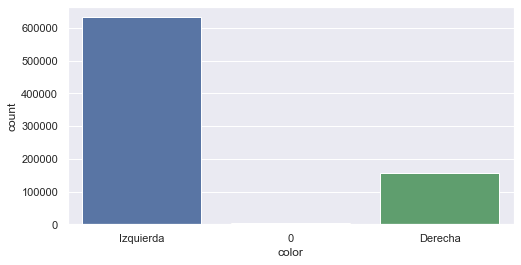

In [669]:

sns.countplot(x = "color", data=boe_df)

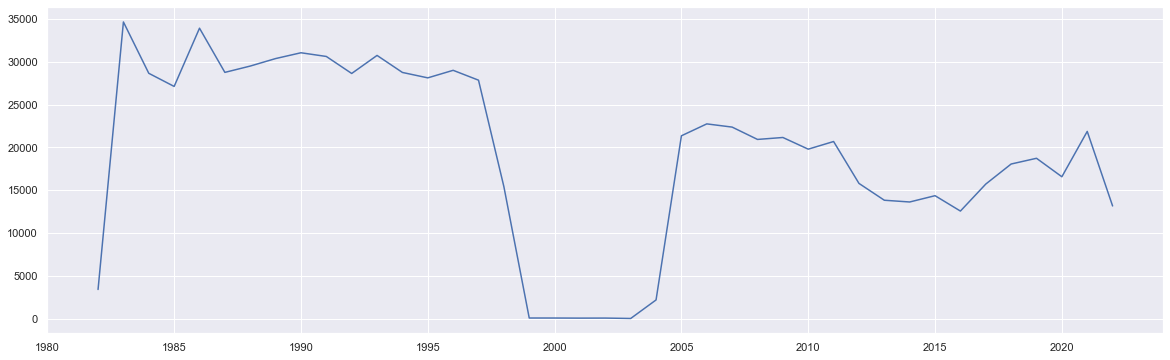

In [705]:
plt.figure(figsize=(20,6))
plt.plot(boe_df['fecha'].dt.year.value_counts().sort_index())

/Users/adriansanchezdelasierra/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


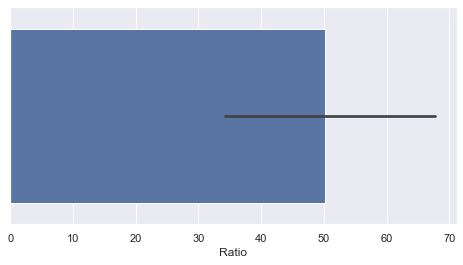

In [661]:
import matplotlib.pyplot as plt


sns.set(rc={"figure.figsize": (8, 4)})
ax = sns.barplot(prop_df.Ratio, label="cor")
plt.show()

/Users/adriansanchezdelasierra/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gobierno', ylabel='Density'>

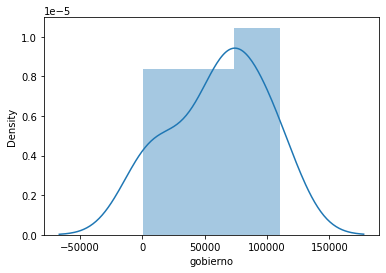

In [597]:
sns.distplot(boe_df.gobierno.value_counts())

In [521]:
pd.to_datetime(url[-8:])

datetime.IsoCalendarDate(year=1983, week=5, weekday=2)

In [145]:
# META


### SECCION 1

# DEPARTAMENTO 1
dicti = diario.getchildren()[1].getchildren()[0].attrib
x = diario.getchildren()[1].getchildren()[0].attrib.keys()[0]
y = diario.getchildren()[1].getchildren()[0].attrib.keys()[1]

departamento = dicti[x]
etiqueta = dicti[y]



In [208]:
dep_01 = diario.getchildren()[1].getchildren()[0].attrib
titulo_01 = diario.getchildren()[1].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].text
id_01 = diario.getchildren()[1].getchildren()[0].getchildren()[0].getchildren()[0].attrib

In [211]:
id_01

{'id': 'BOE-A-2014-10168', 'control': '2014/10183'}

In [ ]:
dep_02 = diario.getchildren()[1].getchildren()[1].attrib

# DEPARTAMENTO 2
dicti = diario.getchildren()[1].getchildren()[1].attrib
x = diario.getchildren()[1].getchildren()[1].attrib.keys()[0]
y = diario.getchildren()[1].getchildren()[1].attrib.keys()[1]
etiqueta_1 = dicti[y]
departamento_1 = dicti[x]
departamento_1

In [207]:
titulo_01 = diario.getchildren()[1].getchildren()[0].getchildren()[0].getchildren()[0].getchildren()[0].text

'Orden AEC/1811/2014, de 3 de octubre, por la que se establece la composición de la plantilla de la Carrera Diplomática y su distribución en las diferentes categorías diplomáticas.'

In [175]:
dicti = diario.getchildren()[1].getchildren()[0].getchildren()[0].attrib
x = diario.getchildren()[1].getchildren()[1].getchildren()[0].attrib.keys()[0]
dicti
epigrafe = dicti[x]
epigrafe

'Carrera Diplomática'

In [182]:
dicti = diario.getchildren()[1].getchildren()[0].getchildren()[0].attrib.keys()
dicti["nombre"]

TypeError: list indices must be integers or slices, not str

In [108]:
for i in meta.getchildren():
    if i.tag == "fecha":
        print(i.text)

07/10/2014


In [68]:

for j,i in enumerate(diario.getchildren()):
    print (j,i,i.getchildren())
    #if i.tag == "fecha":
     #   print(i.text)

0 <Element sumario_nbo at 0x1201f6cc0> [<Element urlPdf at 0x1201f5900>]
1 <Element seccion at 0x1201f6a80> [<Element departamento at 0x1201f5800>, <Element departamento at 0x1201f57c0>]
2 <Element seccion at 0x1201f6f40> [<Element departamento at 0x1201fae40>, <Element departamento at 0x1201fa640>, <Element departamento at 0x1201facc0>, <Element departamento at 0x1201faa80>, <Element departamento at 0x1201fa540>, <Element departamento at 0x1201fa9c0>, <Element departamento at 0x1201fa180>, <Element departamento at 0x1201fa7c0>]
3 <Element seccion at 0x1201f6240> [<Element departamento at 0x1201fae40>, <Element departamento at 0x1201fa500>, <Element departamento at 0x1201fa640>, <Element departamento at 0x1201fa300>, <Element departamento at 0x1201facc0>, <Element departamento at 0x1201faa80>, <Element departamento at 0x1201fa740>, <Element departamento at 0x1201fa540>]
4 <Element seccion at 0x1201f6c80> [<Element departamento at 0x1201fae40>, <Element departamento at 0x1201fa9c0>]
5 <

'/boe/dias/2014/10/07/pdfs/BOE-S-2014-243.pdf'

In [99]:
pdf_url = diario.getchildren()[0]
pdf_url = pdf_url.find("urlPdf").text
pdf_url

'/boe/dias/2014/10/07/pdfs/BOE-S-2014-243.pdf'

In [80]:
diario.getchildren()[0].getchildren()

[<Element urlPdf at 0x1201f5900>]

In [10]:
import requests
import xml.etree.ElementTree as ET

r = requests.get('https://boe.es/diario_boe/xml.php?id=BOE-S-20141007')

if r.status_code == 200:
    start = r.text.find('<?xml')
    end = r.text.find('</textarea>')
    root = ET.fromstring(r.text[start:end])
    print(root)


<Element 'sumario' at 0x107e0b180>


In [706]:
prop_df

,Presidente,Ratio,cor
0,Felipe,81.855948,izquierda
1,Aznar,21.633483,derecha
2,Zapatero,53.880602,izquierda
3,Rajoy,40.043331,derecha
4,Sanchez,53.224409,izquierda


In [21]:
end

70

In [702]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(, y)
fit.scores_